In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [190]:
def directs(name):
    return f'../sbart_cleaning/BehData/{name}/new_Data_P2_{name}.csv'

In [191]:
def contain_zero(array):
    
    for i in range(len(array)):
        if array[i] == 0:
            return True
        
    return False

In [192]:
def index_splits(dataframe):
    p2id = dataframe['P2ID'].values
    
    num = [0]
    for i in range(len(dataframe)-1):
        if p2id[i] != p2id[i+1]:
            num.append(i+1)
    #print(num)
    
    return num

In [213]:
def p2idinfo(dataframe, network):
    p2id = dataframe['P2ID'].values
    p1id = int(dataframe['Participant'].values[0])
    
    count = 0
    newarr = []
    
    
    for i in range(len(p2id)-1):
        if p2id[i] != p2id[i+1]:
            count += 1
            newarr.append(p2id[i])
        
    network[p1id] = newarr
        
            
    # print('hi ola')
    # print('im printing newarrr:')
    # print(newarr)
    
     # 1) split up the dataframe by p2id where game ends
    
    idxs = index_splits(dataframe)
    results = []
    for i in range(len(idxs)-1):
        results.append(dataframe.iloc[idxs[i]:idxs[i+1]])
        
        
    # get only the game with 0
    arrayofindx = []
    for j in range(len(newarr)):
        if newarr[j] == 0:
            arrayofindx.append(results[j])
    
    #zeroinarr = contain_zero(newarr)
    #return zeroinarr
    return arrayofindx

In [209]:
def beh_per_game(filename, network):
    
    # 0) load the dataframe
    df = pd.read_csv(filename)
    df2 = df[['Participant','P2ID','PressPump','P2_PressPump']]
    
    # 1) get the p2id values only 
    
    return p2idinfo(df2, network)

In [210]:
def beh_per_game_for_all_players():
    array = []
    
    network = {}
    
    names = glob('../sbart_cleaning/BehData/*')
    for fname in names:
        pfname = fname[26:]
        #print(pfname)
        filename = directs(pfname)
        #print(filename)
        #processed = process_file(filename)
        #cum_sum(resu(p2info(process_file(filename))))
        
        array.append(beh_per_game(filename, network))
       
    return array, network
    #return array

In [214]:
res, network = beh_per_game_for_all_players()

In [ ]:
print(network)

In [222]:
# matrix index mapping
mat = np.zeros((len(network),len(network)))
i = 0
key2idx = {}
for key in network: 
    key2idx[key] = i
    i += 1
    
    #print(network[key
print(key2idx)

{1: 0, 100: 1, 101: 2, 102: 3, 104: 4, 106: 5, 107: 6, 108: 7, 109: 8, 11: 9, 110: 10, 111: 11, 112: 12, 113: 13, 116: 14, 117: 15, 119: 16, 12: 17, 120: 18, 121: 19, 122: 20, 124: 21, 125: 22, 126: 23, 128: 24, 129: 25, 13: 26, 130: 27, 132: 28, 133: 29, 134: 30, 135: 31, 136: 32, 137: 33, 139: 34, 14: 35, 141: 36, 142: 37, 143: 38, 144: 39, 145: 40, 146: 41, 147: 42, 148: 43, 149: 44, 151: 45, 152: 46, 153: 47, 154: 48, 155: 49, 157: 50, 158: 51, 159: 52, 161: 53, 162: 54, 163: 55, 17: 56, 18: 57, 19: 58, 2: 59, 20: 60, 21: 61, 22: 62, 25: 63, 26: 64, 27: 65, 28: 66, 29: 67, 31: 68, 32: 69, 33: 70, 34: 71, 35: 72, 37: 73, 38: 74, 39: 75, 4: 76, 40: 77, 41: 78, 42: 79, 43: 80, 44: 81, 46: 82, 48: 83, 49: 84, 5: 85, 50: 86, 51: 87, 52: 88, 53: 89, 55: 90, 56: 91, 57: 92, 58: 93, 59: 94, 6: 95, 61: 96, 62: 97, 63: 98, 64: 99, 66: 100, 67: 101, 68: 102, 69: 103, 70: 104, 71: 105, 73: 106, 75: 107, 76: 108, 77: 109, 78: 110, 79: 111, 81: 112, 82: 113, 84: 114, 85: 115, 87: 116, 88: 117, 8

In [224]:
print(network[1])

[0, 19, 0, 21, 22, 0, 22, 16, 0, 2, 3, 16, 0, 2, 16, 2, 20, 0, 2, 0, 2, 16, 22, 2, 19, 0, 18, 2, 4, 2, 17, 19, 0, 22, 0, 3, 2, 22, 19, 2, 3, 2, 0, 16, 4, 18, 0, 16, 19, 2, 22, 0, 2]


In [227]:
print(network.keys())
print(16 in network.keys())

dict_keys([1, 100, 101, 102, 104, 106, 107, 108, 109, 11, 110, 111, 112, 113, 116, 117, 119, 12, 120, 121, 122, 124, 125, 126, 128, 129, 13, 130, 132, 133, 134, 135, 136, 137, 139, 14, 141, 142, 143, 144, 145, 146, 147, 148, 149, 151, 152, 153, 154, 155, 157, 158, 159, 161, 162, 163, 17, 18, 19, 2, 20, 21, 22, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 38, 39, 4, 40, 41, 42, 43, 44, 46, 48, 49, 5, 50, 51, 52, 53, 55, 56, 57, 58, 59, 6, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 73, 75, 76, 77, 78, 79, 81, 82, 84, 85, 87, 88, 89, 9, 91, 92, 93, 94, 95, 96, 97, 98, 99])
False


In [228]:
for key in network:
    arr = network[key]
    idx = key2idx[key]
    for i in range(len(arr)):
        if arr[i] != 0 and arr[i] in key2idx:
            jdx = key2idx[arr[i]]
            mat[idx, jdx] = 1

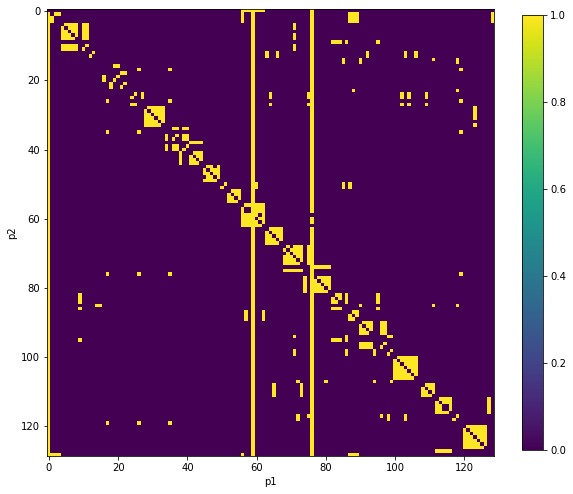

In [239]:
plt.figure(figsize=(10, 10))
plt.imshow(mat, interpolation='none')
plt.colorbar(shrink=0.8)
plt.xlabel('p1')
plt.ylabel('p2')
plt.savefig('figs/heat_map_p1_p2')

In [132]:
for i in range(len(res)):
    data = res[i]
    for j in range(len(data)):
        d2 = data[j]
        x = sum(d2.P2_PressPump)
        if x != 0:
            print(x)

4.0
1.0
1.0
17.0
4.0
1.0
1.0
4.0
2.0
1.0
7.0
2.0
10.0
3.0
13.0
1.0
3.0
1.0
8.0
5.0
2.0
14.0
2.0
1.0
1.0
27.0
7.0
1.0
1.0
8.0
7.0
3.0
31.0
6.0
1.0
4.0


In [135]:
print(res)

[[], [     Participant  P2ID  PressPump  P2_PressPump
0          100.0     1        0.0           0.0
1          100.0     1        0.0           0.0
2          100.0     1        0.0           0.0
3          100.0     1        0.0           0.0
4          100.0     1        1.0           0.0
..           ...   ...        ...           ...
382        100.0     1        1.0           0.0
383        100.0     1        0.0           0.0
384        100.0     1        1.0           0.0
385        100.0     1        0.0           0.0
386        100.0     1        0.0           0.0

[387 rows x 4 columns],      Participant  P2ID  PressPump  P2_PressPump
388        100.0     1        0.0           0.0
389        100.0     1        0.0           0.0
390        100.0     1        0.0           0.0
391        100.0     1        0.0           0.0
392        100.0     1        1.0           0.0
393        100.0     1        0.0           0.0
394        100.0     1        0.0           0.0,       Pa

In [133]:
print(True in res)

False
